## Key Learnings of Session 2
**ML Project:**
- First: Perform basic descriptive statistics to get an idea of what the dataset is about and might identify first insights on what ML Model might be the most applicable fot that certain task
- Plot the Data for visualization and deeper understanding
  - Helps to identify capped data, such as Price of smth doensn't go beyond certain X --> would manipulate the ML and lead to wrong forecasts
- Symmetrical data and more Bell shaped data over skewed right and skewed left data --> Apply Logarithm, it makes the curve more towards Gaussian distribution

**Data Cleaning/Preparation**
 - handle missing values (e.g. with Imputation)
    - e.g. SimpleImputer() --> replaces missing values with the median, mean etc of the respective attribute
 - deal with categorical attribute
    - OrdinalEncoder() --> Convert text values as categorical attributes to numerical values, cause ML prefer to work with numerical values
 - deal with ordinal attribute (such as "Slow", "medium", "fast") --> ML will assume two nearby values are more similar to ea than to distant values
    - use OneHotEncoder to create one binary attribute per category (Only one attribute will than be equal to 1 (hot) while others are 0)
      - eg array([(0.,1.,0.)]) --> means "Medium" 
 
Transformation Pipeline can be used to automate such tasks
- Apply Standardization(values are not restricted to specific range)
  - Less effected by outliers
- MinMaxScaling(values range from 0 to 1) to put numerical attributes on the same scale
- FunctionTransformer() --> Standardize values with np.log
- StandardScaler() --> 
- Feature Scaling and Transformation

- Split dataset into test and train set

**Evaluation of ML model**
  - Cross-validation() --> Splits data into X nonoverlapping splits called "Folds"
    - then it trains and evaluates the model on those X splits
  - Apply Mean Squared error, R Squared Error, Median absolute error
  - Interpret those results

**Fine Tune Model**
- Find good comination of hyperparamter values
 - examples of hyperparameters for Random Forest:
    - Number of decision trees in the forest
    - Maximum depth of each decision tree

  - Grid SearchCV(), Random Search() --> to tune the hyperparameters

#### Data Import

In [ ]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv", sep=",")

data.head(10)

Mounted at /content/drive


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


DataDescription, provided by ChatGPT
- index: An index for each row of the dataset
- instant: A unique identifier for each row
- dteday: The date of each observation in yyyy-mm-dd format
- season: The season of each observation (1:spring, 2:summer, 3:fall, 4:winter)
- yr: The year of each observation (0: 2011, 1:2012)
- mnth: The month of each observation (1 to 12)
- holiday: A binary variable indicating whether the day is a holiday or not (1: holiday, 0: no holiday)
- weekday: The day of the week of each observation (0:Sunday, 1:Monday, ..., 6:Saturday)
- workingday: A binary variable indicating whether the day is a working day or not (1: working day, 0: weekend or holiday)
- weathersit: A categorical variable indicating the weather situation (1: clear, 2: mist/cloudy, 3: light rain/snow, 4: heavy rain/snow)
- temp: The temperature in Celsius --> *Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)*
- atemp: The "feels like" temperature in Celsius
- hum: The humidity level
- windspeed: The wind speed
- casual: The number of casual bike rentals (people who don't have a membership)
- registered: The number of registered bike rentals (people who have a membership)
- cnt: The total number of bike rentals (casual + registered)

#### Descriptive Statistics & General Understanding of the Dataset


In [ ]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*Not a lot of data. For a proper prediction, we might need hourly data and based on that we create a categorical variable of something like "morning", "midday", "evening", "night".*

In [ ]:
data.value_counts()


instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp      atemp     hum       windspeed  casual  registered  cnt 
1        2011-01-01  1       0   1     0        6        0           2           0.344167  0.363625  0.805833  0.160446   331     654         985     1
481      2012-04-25  2       1   4     0        3        1           1           0.476667  0.470317  0.427917  0.118792   655     5541        6196    1
483      2012-04-27  2       1   4     0        5        1           1           0.457500  0.452637  0.400833  0.347633   1014    5219        6233    1
484      2012-04-28  2       1   4     0        6        0           2           0.376667  0.377504  0.489583  0.129975   1120    3100        4220    1
485      2012-04-29  2       1   4     0        0        0           1           0.458333  0.450121  0.587083  0.116908   2229    4075        6304    1
                                                                                             

#### Visualizing the data

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

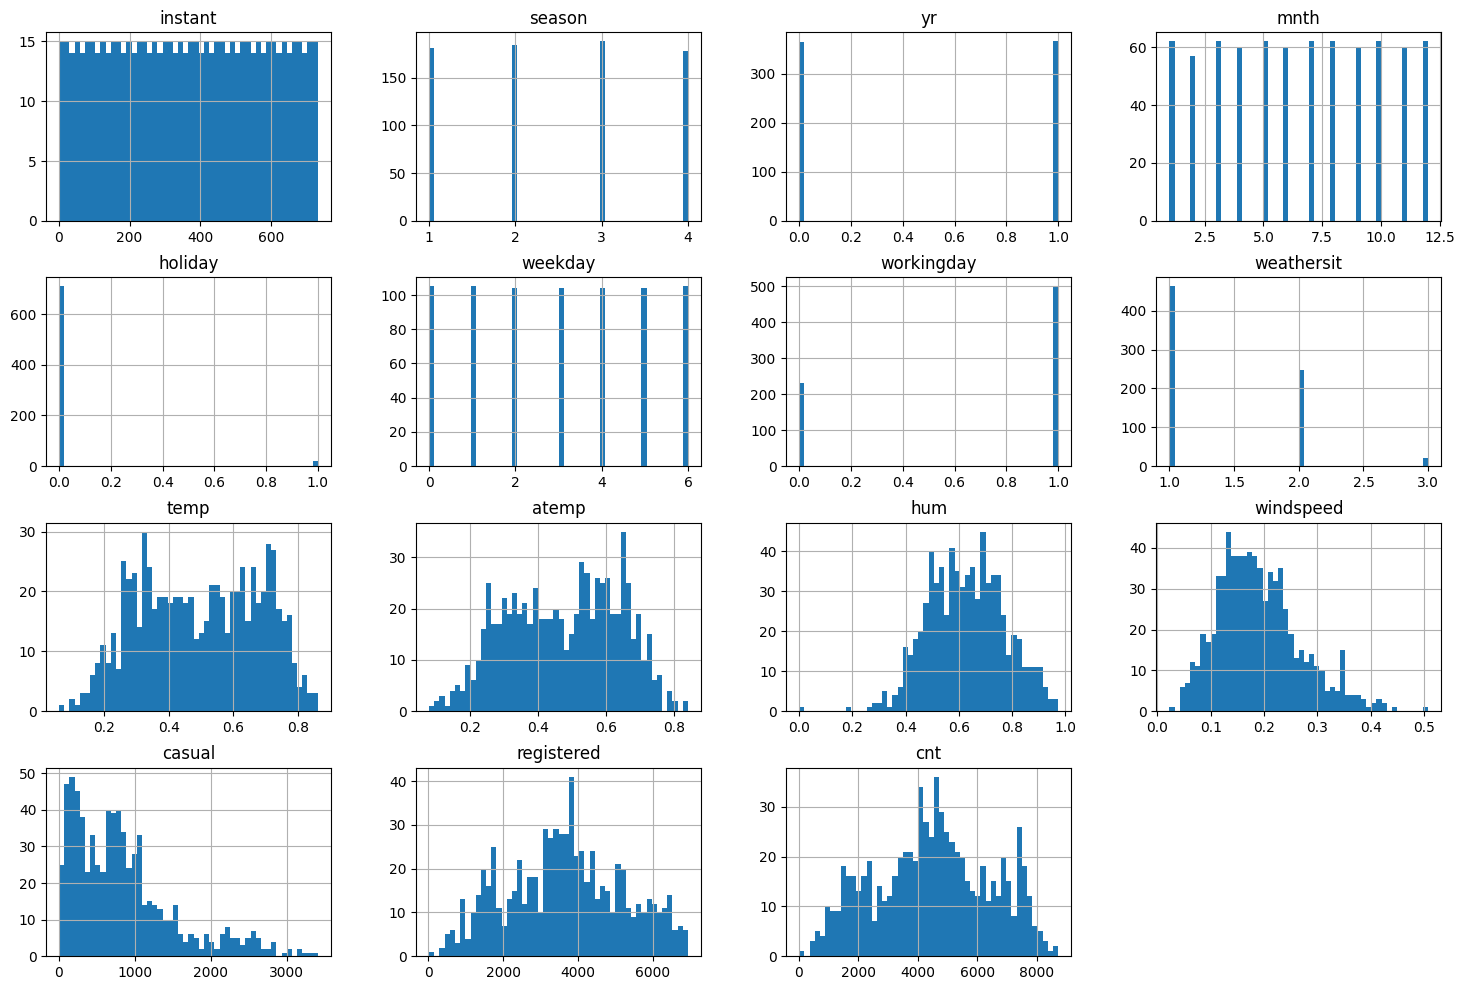

In [ ]:
data.hist(bins=50, figsize=(18,12))

#### Data Cleansing

In [ ]:
data['dteday'] = pd.to_datetime(data['dteday'])

# Unnormalize Temperature --> (t-t_min)/(t_max-t_min) = data['temp'], t_min=-8, t_max=+39
t_max = 38
t_min = -8

#Actual Temp
data['temp_celcius'] = (t_max - t_min) * data['temp'] + t_min
data['temp_celcius'] = data['temp_celcius'].round(2)

#Feels like temp
data['Feels_temp_celcius'] = (t_max - t_min) * data['atemp'] + t_min
data['Feels_temp_celcius'] = data['Feels_temp_celcius'].round(2)

data = data.drop('instant', axis=1)

data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celcius,Feels_temp_celcius
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,7.83,8.73
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,8.72,8.27
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.03,0.71
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.20,1.76
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.44,2.55


#### Create Test DataSet

In [ ]:

#Split Dataset
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2,stratify=data['season'],random_state=42)

train_set['season'].value_counts() / len(train_set)

3    0.256849
2    0.251712
1    0.248288
4    0.243151
Name: season, dtype: float64

In [ ]:
data = train_set.copy()
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celcius,Feels_temp_celcius
372,2012-01-08,1,1,1,0,0,0,1,0.337500,0.340258,0.465000,0.191542,599,2826,3425,7.52,7.65
118,2011-04-29,2,0,4,0,5,1,1,0.510000,0.497463,0.457083,0.240063,878,3717,4595,15.46,14.88
138,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,735,3840,4575,16.42,15.49
164,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891,19.79,19.21
267,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010,21.17,18.34


#### Correlations

Interpretation of correlations: 
- weathersit --> negative correlation, because the lower the weathersit (1: clear, 2: mist/cloudy, 3: light rain/snow, 4: heavy rain/snow) is, the higher cnt becomes
- atemp --> feels like temp has a very slightly higher impact on the rented bikes per day than the actual temperature
- weekday and holiday have surprisingly very little impact on the rented bikes per day

In [ ]:
corr = data.corr()
corr['cnt'].sort_values(ascending=False)

<ipython-input-9-c55c39d507bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


cnt                   1.000000
registered            0.948001
casual                0.669396
atemp                 0.641780
Feels_temp_celcius    0.641772
temp                  0.637256
temp_celcius          0.637253
yr                    0.578027
season                0.406214
mnth                  0.292580
workingday            0.078573
weekday               0.064091
hum                  -0.072021
holiday              -0.095913
windspeed            -0.238051
weathersit           -0.293843
Name: cnt, dtype: float64

<Axes: >

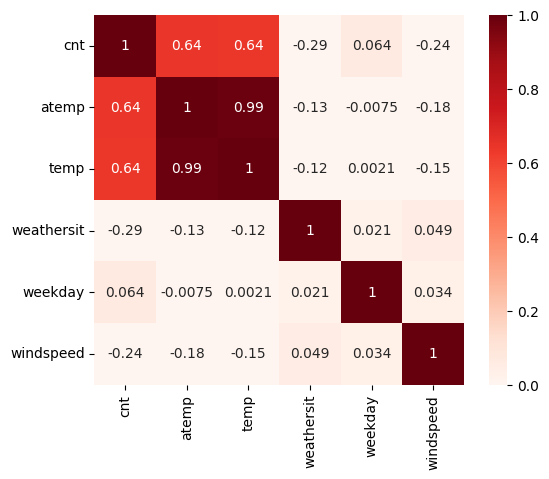

In [ ]:
import seaborn as sns

corr_attributes = data[['cnt', 'atemp', 'temp', 'weathersit', 'weekday', 'windspeed']]
sns.heatmap(corr_attributes.corr(), vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")


Interpretation of scatter matrix:
- Regression model might have a relatively high error when using temp to predict the amount of rented bikes a day, since the correlation is identifiable, but the scattering is quite high 

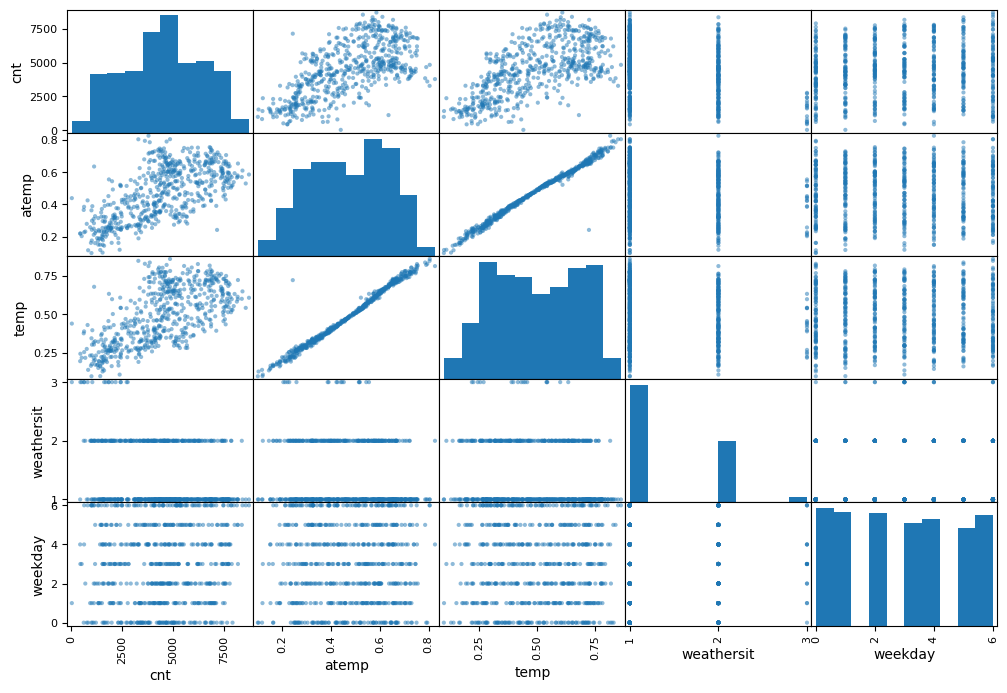

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['cnt', 'atemp', 'temp', 'weathersit', 'weekday']
scatter_matrix(data[attributes], figsize=(12,8))
plt.show()

#### Check for missing data

In [ ]:
null_data = data[data.isnull().any(axis=1)]
null_data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celcius,Feels_temp_celcius


### Transformation


In [ ]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celcius,Feels_temp_celcius
372,2012-01-08,1,1,1,0,0,0,1,0.337500,0.340258,0.465000,0.191542,599,2826,3425,7.52,7.65
118,2011-04-29,2,0,4,0,5,1,1,0.510000,0.497463,0.457083,0.240063,878,3717,4595,15.46,14.88
138,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,735,3840,4575,16.42,15.49
164,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891,19.79,19.21
267,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010,21.17,18.34


In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

label_pipeline = make_pipeline(FunctionTransformer(np.log))

default_num_pipeline = make_pipeline(StandardScaler())

#log_pipeline = make_pipeline(FunctionTransformer(np.log),
#                             StandardScaler())

#Application of preprocessing
preprocessing = ColumnTransformer([
    ("dteday", date_pipeline, ["dteday"]),
# Apply logarithmic transformation and scaling
    #("log" , log_pipeline, ['windspeed', "hum", 'temp', 'atemp',  'temp_celcius', 'Feels_temp_celcius']),
    ("normal", default_num_pipeline, ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'casual',
       'registered'])
])

preprocessing_label = ColumnTransformer([
    ("cnt", label_pipeline, ["cnt"])
])

In [41]:
data_train

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,temp_celcius,Feels_temp_celcius
372,2012-01-08,1,1,1,0,0,0,1,0.337500,0.340258,0.465000,0.191542,599,2826,7.52,7.65
118,2011-04-29,2,0,4,0,5,1,1,0.510000,0.497463,0.457083,0.240063,878,3717,15.46,14.88
138,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,735,3840,16.42,15.49
164,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,19.79,19.21
267,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,21.17,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2012-11-22,4,1,11,1,4,0,1,0.340000,0.350371,0.580417,0.052871,955,1470,7.64,8.12
403,2012-02-08,1,1,2,0,3,1,2,0.256667,0.266421,0.722917,0.133721,109,2693,3.81,4.26
70,2011-03-12,1,0,3,0,6,0,1,0.329167,0.325750,0.594583,0.220775,724,1408,7.14,6.98
409,2012-02-14,1,1,2,0,2,1,2,0.319167,0.333946,0.508750,0.141179,135,3787,6.68,7.36


#### ML Training

In [44]:
data_train = train_set.drop('cnt', axis=1)
data_label= train_set[['cnt']].copy()
data_prepared = preprocessing.fit_transform(data_train)
data_label.head()

<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]


,cnt
372,3425
118,4595
138,4575
164,4891
267,5010


In [45]:
from sklearn.metrics import make_scorer
def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(((np.exp(y_true) - np.exp(y_pred)) ** 2).mean())

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=True)

In [46]:
data_prepared

array([[-0.06397465, -1.34631356,  1.02426696, ..., -0.7173359 ,
        -0.36841836, -0.5071972 ],
       [ 1.14229751, -0.44568685, -0.97630797, ..., -0.7173359 ,
         0.0433203 ,  0.05612141],
       [ 1.04731545, -0.44568685, -0.97630797, ...,  1.12005079,
        -0.16771421,  0.13388593],
       ...,
       [ 1.37025445, -1.34631356, -0.97630797, ..., -0.7173359 ,
        -0.18394764, -1.40370202],
       [-0.23969146, -1.34631356,  1.02426696, ...,  1.12005079,
        -1.05317369,  0.10037764],
       [ 1.70269166, -1.34631356, -0.97630797, ...,  1.12005079,
        -0.76392359, -1.88040486]])

In [54]:
#Try
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]
<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]


In [112]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

data_label_transformed = pd.DataFrame(preprocessing_label.fit_transform(data_label))

model = make_pipeline(preprocessing, LinearRegression())
model.fit(data, data_label_transformed)

data_predictions = model.predict(data)

<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]
<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]


In [110]:
# Your task
med_abs = (np.abs(np.exp(data_predictions)-data_label)).median()
print(med_abs)
rmse = np.sqrt(((np.exp(data_predictions)-data_label)**2).mean())
print(rmse)
mean_prices = data_label.median()
print(mean_prices)

cnt    387.756115
dtype: float64
cnt    780.178754
dtype: float64
cnt    4530.0
dtype: float64


In [61]:
#lins_rmses = -cross_val_score(model, data_prepared, data_label_transformed,
# scoring=neg_exp_root_mean_squared_error, cv=10)

#data_pred = model.predict(data_train)
#print("Prediction:" ,  data_pred[0:10])
#print("Actual", data_label_transformed[0:10])

ValueError: ignored

Interpretation of Linear Regression:
- Median prediction is way off
- Median absolute Error is >1000 bike rents per day which is bad
- R Squared of 0.34 is really bad

In [113]:
xtest = test_set.drop("cnt", axis=1)
ytest = test_set["cnt"].copy()
ytest = ytest.to_frame()
ytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 165 to 652
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cnt     147 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score


# Linear Regression
test_lr_predictions = lin_reg.predict(xtest)
# Median Percentage error of Absolute Error
med_per_err_absolute = (np.abs(np.exp(test_lr_predictions)-ytest)/np.abs(ytest)).median()
print("Median Percentage error of Absolute Error: ",med_per_err_absolute)

# Mean Percentage error of Absolute Error

mean_per_err_absolute = (np.abs(np.exp(test_lr_predictions))-ytest)/np.abs(ytest).mean()
print("Mean Percentage error of Absolute Error: ", mean_per_err_absolute)

# Normalized error of Root Mean Square Error
norm_rmse = np.sqrt((np.exp(test_lr_predictions)-ytest)**2).mean()/ytest.mean()
print("Normalized error of Root Mean Square Error:" , norm_rmse)


print("Median prediction", np.median(np.exp(test_lr_predictions)))
print("Actual median", np.median(ytest))
print("Median absolute Error", median_absolute_error(np.exp(test_lr_predictions), ytest))
print("Mean Squared Error", mean_squared_error(np.exp(test_lr_predictions), ytest))
print("R Squared", r2_score(np.exp(test_lr_predictions), ytest))

Median Percentage error of Absolute Error:  cnt    0.11826
dtype: float64
Mean Percentage error of Absolute Error:            cnt
165  0.050122
626 -0.222493
367 -0.069568
175 -0.021781
340  0.102962
..        ...
292 -0.065300
132 -0.102603
57  -0.013198
256 -0.005485
652  0.071082

[147 rows x 1 columns]
Normalized error of Root Mean Square Error: cnt    0.133492
dtype: float64
Median prediction 4146.62441878305
Actual median 4579.0
Median absolute Error 410.84457815387714
Mean Squared Error 701083.5780981155
R Squared 0.8826453814447806


<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]


#### Random Forest -> Regression Task


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

data_label_transformed_rf = preprocessing_label.fit_transform(data_label)
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed_rf))



<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('dteday',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function time at 0x7efe1b5bf2e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['dteday']),
                                                 ('normal',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['season', 'yr', 'mnth',
                                                   'holiday', 'weekday',
                                                   'workingday', 'weathersit',
                                                   'casual', 'registered'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [76]:

test_label_transformed = preprocessing_label.fit_transform(data_label)
Ran_Forest_prediction = forest_reg.predict(xtest)
#Ran_Forest_prediction=Ran_Forest_prediction.reshape((-1,1))

print("Random Forest - Median Prediction: ", np.median(np.exp(Ran_Forest_prediction)))
#print("Median Absolute Error" , median_absolute_error(np.exp(test_label_transformed), np.exp(Ran_Forest_prediction)))
#print("Mean Squared Error", mean_squared_error(np.exp(test_label_transformed), np.exp(Ran_Forest_prediction), squared=False))
print("Random Forest - Mean Absulute Error: ", np.median(np.abs(np.exp(Ran_Forest_prediction) - np.ravel(ytest))/np.abs(np.ravel(ytest))))

#print("R Squared", r2_score(np.exp(test_label_transformed), np.exp(Ran_Forest_prediction)))

Random Forest - Median Prediction:  4604.66830780954
Random Forest - Mean Absulute Error:  0.008680557007973894


<ipython-input-43-cc10843410a4>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  a =  pd.to_datetime("now") - X[X.columns[0]]
